# ==========================================================
# 🎯 Étude de cas : Modèle prédictif sur le dataset insurance.csv
# Objectif : Prédire les frais médicaux ('charges') à partir des caractéristiques d'un assuré
# Auteur : Kossi Noumagno
# ==========================================================

In [ ]:
# --- 1️⃣ Importation des bibliothèques ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# DataSet loading

In [ ]:
# --- 2️⃣ Chargement du dataset ---
df = pd.read_csv("insurance.csv")

# --- 3️⃣ Exploration rapide ---
print("Aperçu du dataset :")
print(df.head())
print("\nRésumé statistique :")
print(df.describe())
print("\nValeurs manquantes :")
print(df.isna().sum())

# --- 4️⃣ Visualisation exploratoire ---
plt.figure(figsize=(6,4))
sns.histplot(df['charges'], kde=True)
plt.title("Distribution des frais médicaux (charges)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Impact du tabagisme sur les frais médicaux")
plt.show()

# --- 5️⃣ Encodage des variables catégorielles ---
df_encoded = pd.get_dummies(df, drop_first=True)

# --- 6️⃣ Séparation des variables explicatives et cible ---
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# --- 7️⃣ Division des données en train et test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 8️⃣ Entraînement du modèle ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 9️⃣ Prédictions ---
y_pred = model.predict(X_test)

# --- 🔟 Évaluation du modèle ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Évaluation du modèle :")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

# --- 11️⃣ Interprétation des coefficients ---
coeff_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n🔍 Influence des variables :")
print(coeff_df)

# --- 12️⃣ Visualisation des prédictions ---

Aperçu du dataset :
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Résumé statistique :
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Valeurs manquantes :
age         0
sex    

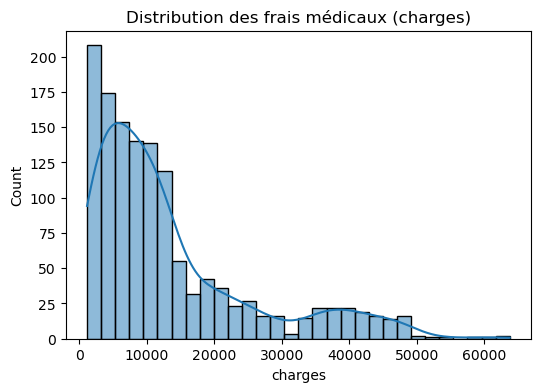

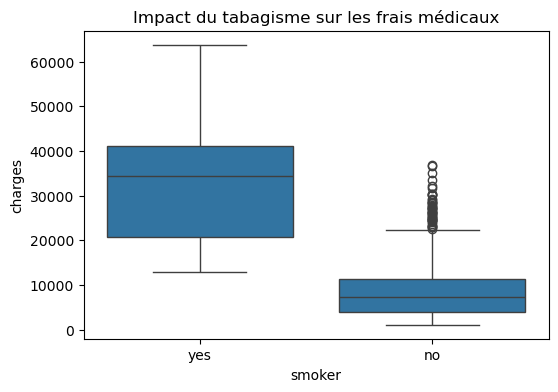


📊 Évaluation du modèle :
MAE  : 4181.19
RMSE : 5796.28
R²   : 0.784

🔍 Influence des variables :
           Variable   Coefficient
4        smoker_yes  23651.128856
2          children    425.278784
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


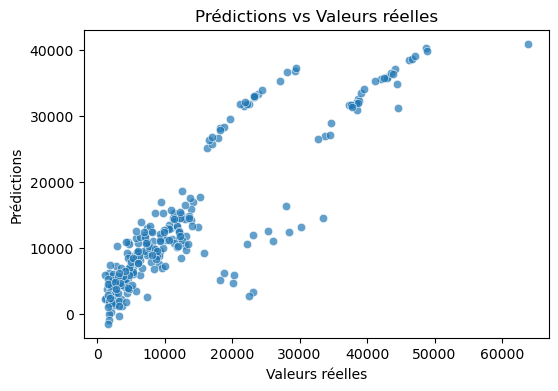

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles")
plt.show()